In [1]:
import functools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import lmfit
from lmfit import Parameter, Parameters 

from sivqed.models.cavity import Cavity, MultiQubitCavity
from sivqed.models.fitter import single_siv_ref_model, two_siv_ref_model, mcmc

plt.rcParams['font.size'] = 18

In [2]:
def not_in_range(arr, ranges):
    """ Returns indices of `arr` that do not lie in the list 
        of (start, end) tuples in ranges. """
    
    conditions = []
    # AND of (x < start OR x > end) leads to all x that are 
    # outside of the (start, end) ranges.
    for start, end in ranges:
        conditions.append((arr < start) | (arr > end)) 
    return np.where(functools.reduce(np.logical_and, conditions))

# Fitting empty cavity + 1 SiV

Text(0.5, 1.0, 'Filtered cavity spectrum')

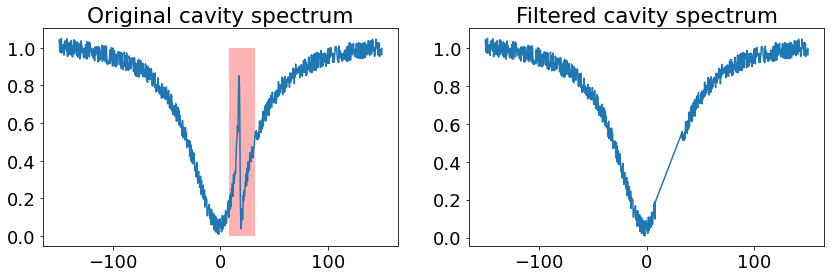

In [3]:
# Cavity with 1 SiV
w_arr = np.linspace(-150, 150, 1000)
c = Cavity()
# Generate data with noise
data = c.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1 

# Range of frequencies to filter out to remove SiV peaks
filter_range = [(8, 32)]

# Filter the freq and intensity values
filtered_indices = not_in_range(w_arr, filter_range)
w_arr_filtered = w_arr[filtered_indices]
data_filtered = data[filtered_indices]

# Plot original and filtered cavity
fig, ax = plt.subplots(figsize=[14, 4], ncols=2)
ax[0].plot(w_arr, data)
ax[0].set_title("Original cavity spectrum")
for start, end in filter_range:
    ax[0].add_patch(patches.Rectangle((start, 0), (end-start), 1.0, facecolor='red', alpha=0.3))

ax[1].plot(w_arr_filtered, data_filtered)
ax[1].set_title("Filtered cavity spectrum")

## Fit empty cavity

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 283
    # data points      = 1000
    # variables        = 8
    chi-square         = 0.83463427
    reduced chi-square = 8.4137e-04
    Akaike info crit   = -7072.51693
    Bayesian info crit = -7033.25488
[[Variables]]
    w_up:      17.4989147 +/- 0.02807671 (0.16%) (init = 30)
    g_up:      5.65557759 +/- 0.07628299 (1.35%) (init = 1)
    gamma_up:  0.11924761 +/- 0.02309549 (19.37%) (init = 1)
    w_c:      -0.04568098 +/- 0.10679380 (233.78%) (init = 1)
    k_in:      15.9546225 +/- 2.61704049 (16.40%) (init = 15)
    k_tot:     32.9756316 +/- 0.22238496 (0.67%) (init = 30)
    A:         0.99620354 +/- 0.01174871 (1.18%) (init = 1)
    B:         0.05230952 +/- 0.01174806 (22.46%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)            = -0.986
    C(k_in, B)         =  0.967
    C(k_in, A)         = -0.962
    C(gamma_up, k_in)  = -0.791
    C(gamma_up, B)     = -0.758

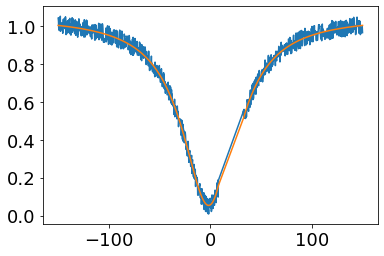

In [4]:
params = Parameters()
params.add_many(
    Parameter('w_up', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up', value=1, min=0, max=np.inf),
    Parameter('gamma_up', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = single_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr_filtered, data_filtered)
plt.plot(w_arr_filtered, single_siv_ref_model.eval(results.params, w=w_arr_filtered))

## Fit SiV in cavity

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 283
    # data points      = 1000
    # variables        = 8
    chi-square         = 0.83463427
    reduced chi-square = 8.4137e-04
    Akaike info crit   = -7072.51693
    Bayesian info crit = -7033.25488
[[Variables]]
    w_up:      17.4989147 +/- 0.02807671 (0.16%) (init = 30)
    g_up:      5.65557759 +/- 0.07628299 (1.35%) (init = 1)
    gamma_up:  0.11924761 +/- 0.02309549 (19.37%) (init = 1)
    w_c:      -0.04568098 +/- 0.10679380 (233.78%) (init = 1)
    k_in:      15.9546225 +/- 2.61704049 (16.40%) (init = 15)
    k_tot:     32.9756316 +/- 0.22238496 (0.67%) (init = 30)
    A:         0.99620354 +/- 0.01174871 (1.18%) (init = 1)
    B:         0.05230952 +/- 0.01174806 (22.46%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B)            = -0.986
    C(k_in, B)         =  0.967
    C(k_in, A)         = -0.962
    C(gamma_up, k_in)  = -0.791
    C(gamma_up, B)     = -0.758

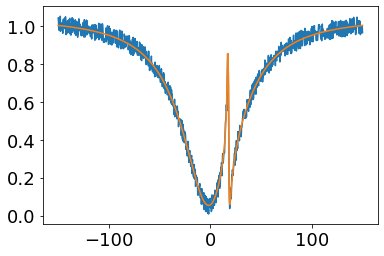

In [5]:
params = Parameters()
params.add_many(
    Parameter('w_up', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up', value=1, min=0, max=np.inf),
    Parameter('gamma_up', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = single_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr, data)
plt.plot(w_arr, single_siv_ref_model.eval(results.params, w=w_arr))

100%|██████████████████████████████████████████████████████████████████████████████| 9000/9000 [02:07<00:00, 70.53it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 8 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 180;
tau: [249.19392112 243.94860303 509.32615494 220.98240325 677.06710533
 181.85654951 537.77207492 540.2303507  115.28331287]


Median of posterior probability distribution
--------------------------------------------
[[Variables]]
    w_up:       17.4970171 +/- 0.02831372 (0.16%) (init = 17.49891)
    g_up:       5.64850223 +/- 0.07420002 (1.31%) (init = 5.655578)
    gamma_up:   0.12096093 +/- 0.02255819 (18.65%) (init = 0.1192476)
    w_c:       -0.04450428 +/- 0.10618330 (238.59%) (init = -0.04568098)
    k_in:       15.6203223 +/- 2.50958055 (16.07%) (init = 15.95462)
    k_tot:      32.9860554 +/- 0.22615121 (0.69%) (init = 32.97563)
    A:          1.00753059 +/- 0.02667231 (2.65%) (init = 0.9962035)
    B:          0.04101449 +/- 0.02663952 (64.95%) (init = 0.05230952)
    __lnsigma: -3.53935832 +/- 0.02204327 (0.62%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.400)
    C(A, B)           = -0.998
    C(gamma_up, k_in) = -0.767
    C(w_up, k_in)     =  0.455
    C(k_in, B)        =  0.455
    C(k_in, A)        = -0.453

Maximum Likelihood Estimation from emcee       
------------

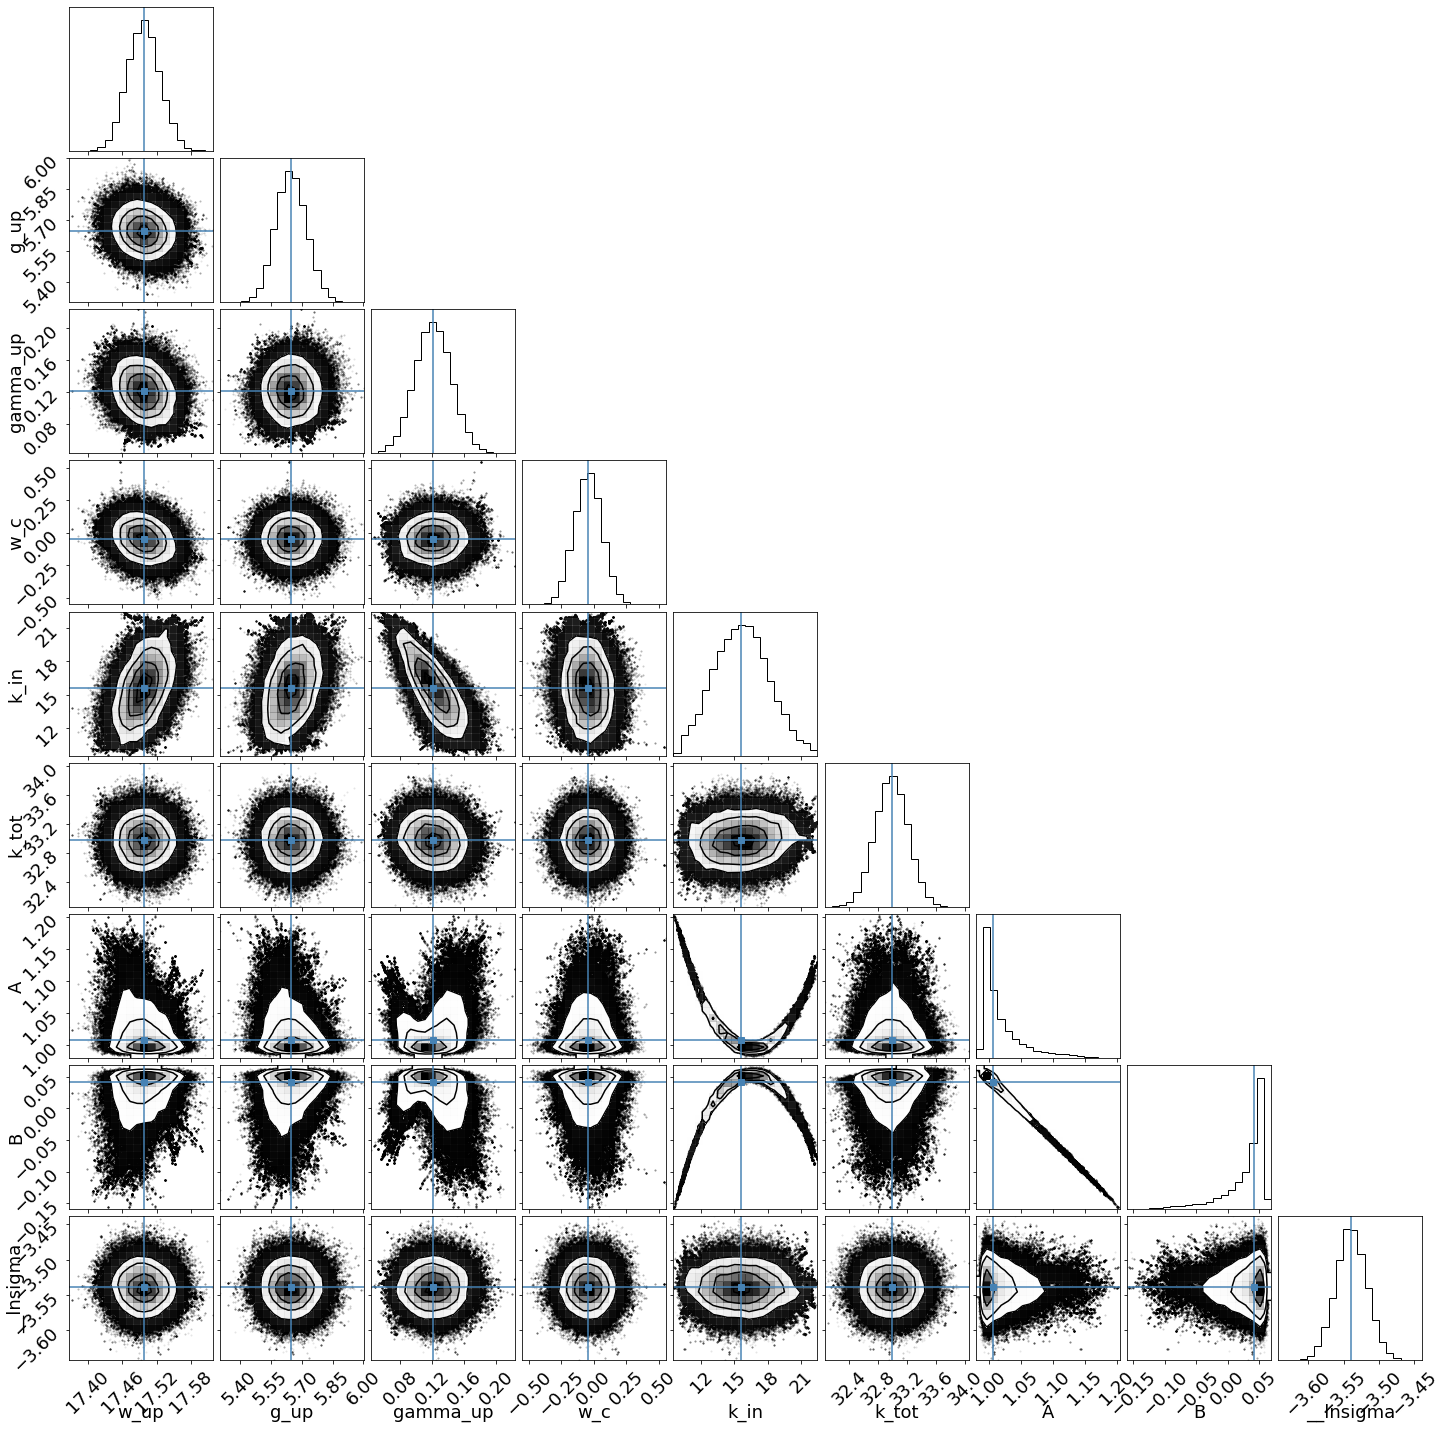

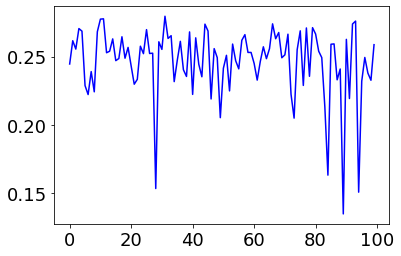

In [7]:
# Compute the correlations and error in the fits using MCMC
# data_noise is a 3-tuple (expected noise in data, min estimate, max estimate)
# input_params is a dict passed into the emcee package
emcee_results, emcee_mle_params = mcmc(w_arr, data, single_siv_ref_model, results, data_noise=[0.1, 0.001, 1], input_params={"steps": 9000})

# Fitting multiple SiVs

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 370
    # data points      = 1000
    # variables        = 11
    chi-square         = 0.82414049
    reduced chi-square = 8.3331e-04
    Akaike info crit   = -7079.16954
    Bayesian info crit = -7025.18423
[[Variables]]
    w_up_1:      17.5240293 +/- 0.02480652 (0.14%) (init = 30)
    g_up_1:      5.65362042 +/- 0.06789326 (1.20%) (init = 1)
    gamma_up_1:  0.10541086 +/- 0.01967360 (18.66%) (init = 1)
    w_up_2:      150.043189 +/- 0.03373114 (0.02%) (init = 148)
    g_up_2:      5.62829893 +/- 0.42685702 (7.58%) (init = 1)
    gamma_up_2:  0.06550447 +/- 0.02857429 (43.62%) (init = 1)
    w_c:        -0.12128716 +/- 0.10789294 (88.96%) (init = 1)
    k_in:        17.8285172 +/- 2.22134312 (12.46%) (init = 15)
    k_tot:       33.2292261 +/- 0.19931357 (0.60%) (init = 30)
    A:           1.00517332 +/- 0.01896364 (1.89%) (init = 1)
    B:           0.04585325 +/- 0.01895834 (41.35%) (init = 0)
[[Correla

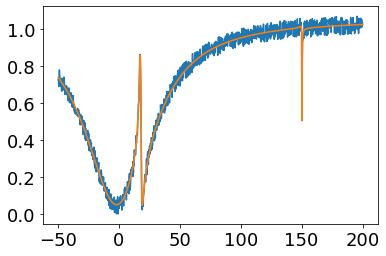

In [36]:
m = MultiQubitCavity(None, [{}, {"w_up": 150}])
w_arr = np.linspace(-50, 200, 1000)
data = m.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1
plt.plot(w_arr, data)

params = Parameters()
params.add_many(
    Parameter('w_up_1', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up_1', value=1, min=0, max=np.inf),
    Parameter('gamma_up_1', value=1, min=0, max=np.inf),
    Parameter('w_up_2', value=148, min=-np.inf, max=np.inf),
    Parameter('g_up_2', value=1, min=0, max=np.inf),
    Parameter('gamma_up_2', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = two_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr, two_siv_ref_model.eval(results.params, w=w_arr))